# Database connection 
 

In [19]:
import pymysql

# Establishing a connection
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='mk2002',
    database='crime_dataa'
)

cursor = connection.cursor()

# Execute the query
cursor.execute("SELECT * FROM crimedata;")
result = cursor.fetchall()

# Print the data (assuming you want to see it in the console)
for row in result:
  print(row)  # Each row is a tuple containing data from each column

# Close the connection
connection.close()


(10304468, '01-08-2020', '01-08-2020', 'Southwest', 624, 'BATTERY - SIMPLE ASSAULT', 36, 'F', 'SINGLE FAMILY DWELLING', 'AO', '1100 W 39TH PL', 34.01, -118.3)
(190101086, '01-02-2020', '01-01-2020', 'Central', 624, 'BATTERY - SIMPLE ASSAULT', 25, 'M', 'SIDEWALK', 'IC', '700 S HILL ST', 34.05, -118.25)
(191501505, '01-01-2020', '01-01-2020', 'N Hollywood', 745, 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 76, 'F', 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)', 'IC', '5400 CORTEEN PL', 34.17, -118.4)
(191921269, '01-01-2020', '01-01-2020', 'Mission', 740, 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 31, 'X', 'BEAUTY SUPPLY STORE', 'IC', '14400 TITUS ST', 34.22, -118.45)
(200100502, '01-02-2020', '01-02-2020', 'Central', 442, 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 23, 'M', 'DEPARTMENT STORE', 'IC', '700 S FIGUEROA ST', 34.05, -118.26)
(200100504, '01-04-2020', '01-04-2020', 'Central', 946, 'OTHER MISCELLANEOUS CRIME', 0, 'X', 'POLICE FACILITY', 'IC', '200 E 6TH ST', 34.

# Data Exploration
--Identify Distinct Crime Codes

In [2]:
import pymysql

# Assuming you have connection details stored elsewhere
connection = pymysql.connect(host="localhost", user="root", password="mk2002", database="crime_dataa")
#Retrieving basic statistics, identifying distinct crime codes, and exploring unique values in specific columns..
try:
    with connection.cursor() as cursor:
        # Reconnect before each query if necessary
        connection.ping(reconnect=True)

        # Execute your queries here
        cursor.execute("SELECT COUNT(*) FROM crimedata;")
        total_records = cursor.fetchone()[0]

        cursor.execute("SELECT COUNT(DISTINCT crm_cd) FROM crimedata;")
        unique_crime_codes = cursor.fetchone()[0]

        print(f"Total records: {total_records}")
        print(f"Unique crime codes: {unique_crime_codes}")

finally:
    connection.close()


Total records: 499
Unique crime codes: 42


--Distinct crime codes and their descriptions:

In [3]:
import pymysql

# Database connection details
db_host = 'localhost'
db_user = 'root'
db_password = 'mk2002'
db_name = 'crime_dataa'  # Ensure this matches the name of your database

def get_distinct_crime_codes(cursor):
    cursor.execute("SELECT DISTINCT crm_cd, crm_cd_desc FROM crimedata")  # Update with actual column names
    crime_codes = cursor.fetchall()

    print("Distinct crime codes and their descriptions:")
    for code, description in crime_codes:
        print(f"{code}: {description}")

# Establish a database connection
try:
    connection = pymysql.connect(host=db_host,
                                 user=db_user,
                                 password=db_password,
                                 database=db_name)

    # Create a cursor object
    cursor = connection.cursor()

    # Call the function
    get_distinct_crime_codes(cursor)

except pymysql.MySQLError as e:
    print(f"Error: {e}")

finally:
    # Close the cursor and connection
    cursor.close()
    connection.close()


Distinct crime codes and their descriptions:
624: BATTERY - SIMPLE ASSAULT
745: VANDALISM - MISDEAMEANOR ($399 OR UNDER)
740: VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)
442: SHOPLIFTING - PETTY THEFT ($950 & UNDER)
946: OTHER MISCELLANEOUS CRIME
341: THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD
330: BURGLARY FROM VEHICLE
930: CRIMINAL THREATS - NO WEAPON DISPLAYED
648: ARSON
354: THEFT OF IDENTITY
230: ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
761: BRANDISH WEAPON
350: THEFT, PERSON
310: BURGLARY
480: BIKE - STOLEN
623: BATTERY POLICE (SIMPLE)
440: THEFT PLAIN - PETTY ($950 & UNDER)
510: VEHICLE - STOLEN
210: ROBBERY
900: VIOLATION OF COURT ORDER
888: TRESPASSING
420: THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
886: DISTURBING THE PEACE
421: THEFT FROM MOTOR VEHICLE - ATTEMPT
647: THROWING OBJECT AT MOVING VEHICLE
940: EXTORTION
662: BUNCO, GRAND THEFT
220: ATTEMPTED ROBBERY
625: OTHER ASSAULT
755: BOMB SCARE
649: DOCUMENT FORGERY / STOLEN FELONY
901: 

# Temporal Analysis
--Analyze trends in crime occurrence over time.

NameError: name 'plt' is not defined

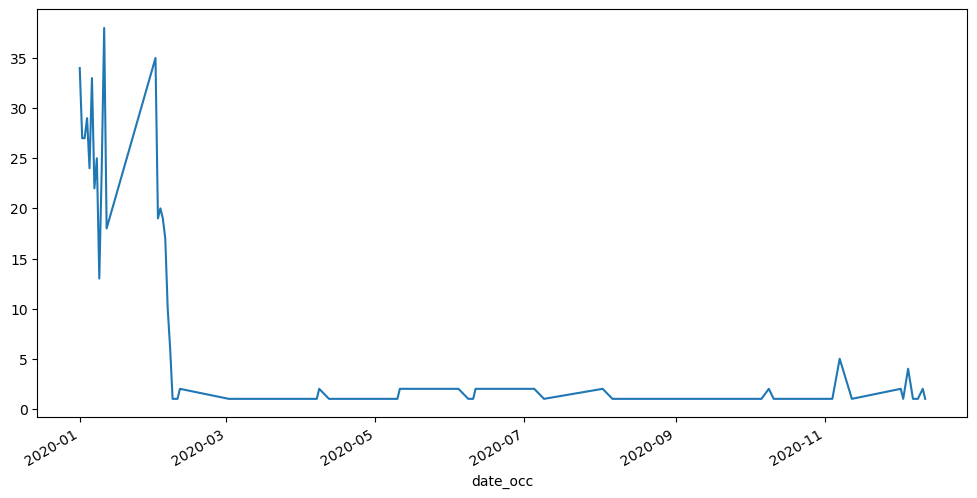

In [4]:
import pandas as pd
from sqlalchemy import create_engine
#Analyzing trends in crime occurrence over time.
db_host = 'localhost'
db_user = 'root'
db_password = 'mk2002'
db_name = 'crime_dataa'

# Construct the SQLAlchemy engine URL (fix the variable names)
engine_url = f"mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_name}"

# Create the SQLAlchemy engine
engine = create_engine(engine_url)

try:
    # Execute the query
    query = "SELECT date_occ, COUNT(*) FROM crimedata GROUP BY date_occ;"
    df = pd.read_sql(query, engine)  # Use the engine object here

    # Process the DataFrame
    df['date_occ'] = pd.to_datetime(df['date_occ'])
    df.set_index('date_occ', inplace=True)

    # Create the line plot
    df.plot(kind='line', figsize=(12, 6), legend=False)
    plt.title('Crime Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Crimes')
    plt.show()

finally:
    engine.dispose()  # Close the connection to the database


# Spatial Analysis

In [ ]:
pip install folium

In [4]:
import pandas as pd
import folium
from sqlalchemy import create_engine
from IPython.display import display

# Replace with your database credentials
db_host = 'localhost'
db_user = 'root'
db_password = 'mk2002'
db_name = 'crime_dataa'
#Utilizing geographical information to perform spatial analysis and visualize crime hotspots on a map.
# Create a connection string
connection_string = f'mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_name}'

# Create an SQLAlchemy engine
engine = create_engine(connection_string)

# Query to select LAT and LON from crimedata
query = "SELECT LAT, LON FROM crimedata WHERE LAT IS NOT NULL AND LON IS NOT NULL;"

# Read the data into a pandas DataFrame
df = pd.read_sql(query, engine)

# Check if the DataFrame is empty
if df.empty:
    print("No data retrieved from the database.")
else:
    # Create a map centered around the USA
    m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

    # Add Markers to the map for each crime location
    for index, row in df.iterrows():
        folium.Marker([row['LAT'], row['LON']], icon=folium.Icon(color='red', icon='info-sign')).add_to(m)

    # Display the map in the notebook
    display(m)


# Victim Demographics

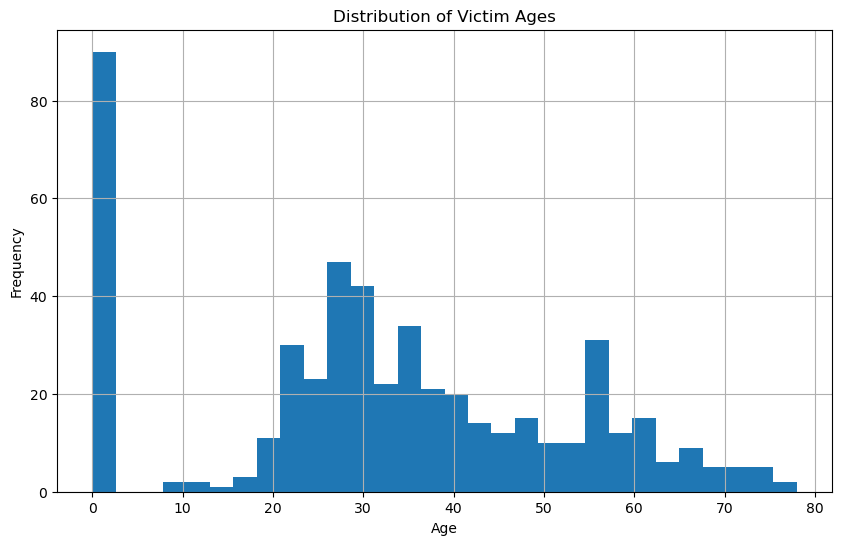

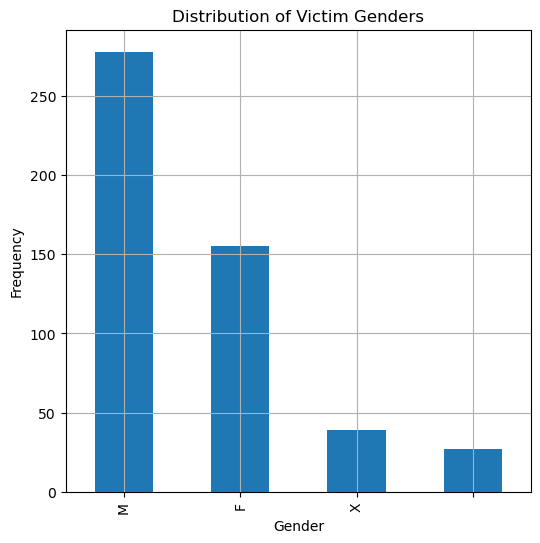

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Replace with your database credentials
db_host = 'localhost'
db_user = 'root'
db_password = 'mk2002'
db_name = 'crime_dataa'
# Investigating the distribution of victim ages and genders, and identifying common premises descriptions for crimes.
# Create a connection string
connection_string = f'mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_name}'

# Create an SQLAlchemy engine
engine = create_engine(connection_string)

# Query to select victim_age and victim_sex from crimes
query = "SELECT Vict_Age as victim_age, Vict_Sex as victim_sex FROM crimedata;"
df = pd.read_sql(query, engine)

# Plot distribution of victim ages
plt.figure(figsize=(10, 6))
df['victim_age'].dropna().hist(bins=30)
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot distribution of victim genders
plt.figure(figsize=(6, 6))
df['victim_sex'].dropna().value_counts().plot(kind='bar')
plt.title('Distribution of Victim Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Status Analysis

  status  count
0     AO     24
1     IC    447
2     AA     27
3     JO      1


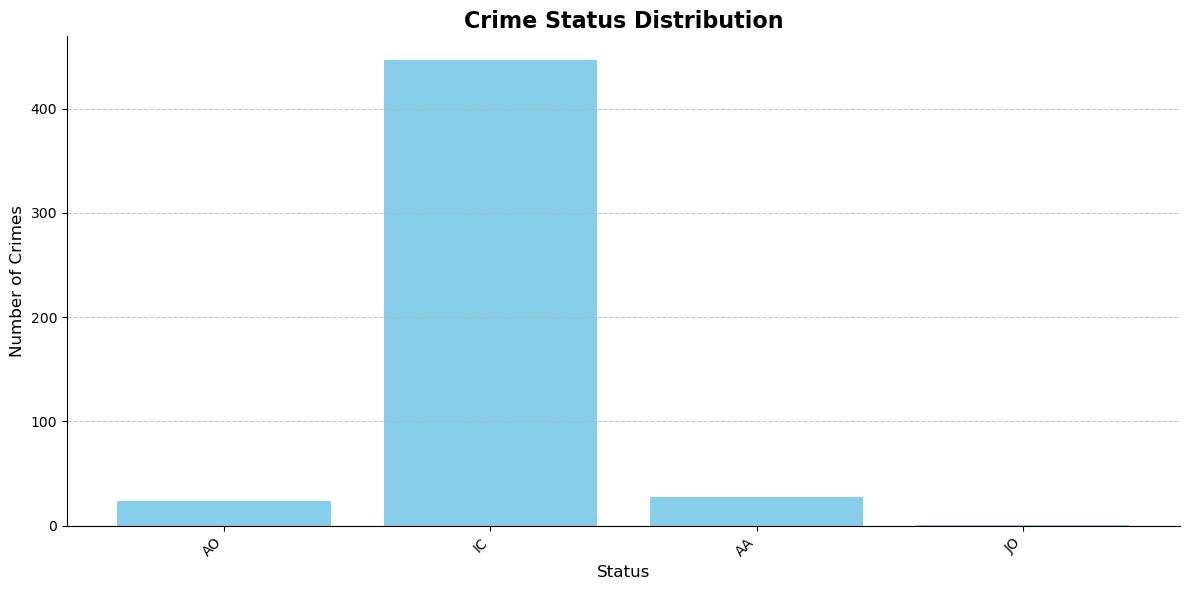

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Database credentials
db_host = 'localhost'
db_user = 'root'
db_password = 'mk2002'
db_name = 'crime_dataa'
#Examining the status of reported crimes and classifying them based on their current status.
# Create a connection string
connection_string = f'mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_name}'

# Create an SQLAlchemy engine
engine = create_engine(connection_string)

# Query to select status and count of crimes grouped by status
query = "SELECT Status as status, COUNT(*) as count FROM crimedata GROUP BY Status;"

# Read the data into a pandas DataFrame
df = pd.read_sql(query, engine)

# Plot the distribution of crime statuses
plt.figure(figsize=(12, 6))
plt.bar(df['status'], df['count'], color='skyblue')
plt.title('Crime Status Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Status', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
print(df)
plt.show()


#  Crime Code Analysis

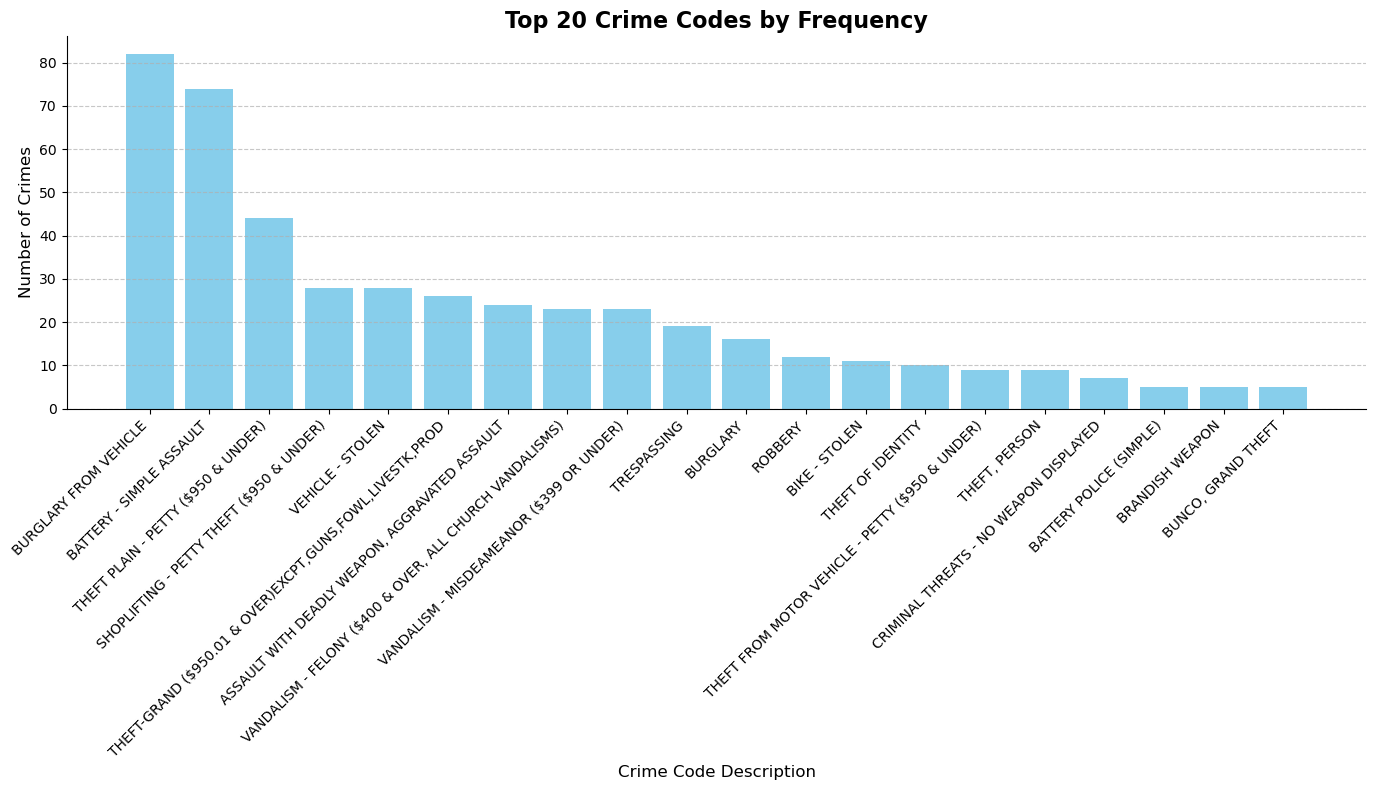

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Replace with your database credentials
db_host = 'localhost'
db_user = 'root'
db_password = 'mk2002'
db_name = 'crime_dataa'
# Examining the status of reported crimes and classifying them based on their current status.
# Create a connection string
connection_string = f'mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_name}'
#distribution of reported crimes based on Crime Code
# Create an SQLAlchemy engine
engine = create_engine(connection_string)

# Query to select crime_code, crime_code_description, and count of crimes grouped by crime_code and crime_code_description
query = "SELECT Crm_Cd as crime_code, Crm_Cd_Desc as crime_code_description, COUNT(*) AS crime_count FROM crimedata GROUP BY Crm_Cd, Crm_Cd_Desc;"

# Read the data into a pandas DataFrame
df = pd.read_sql(query, engine)

# Sort the DataFrame by count of crimes in descending order
df.sort_values(by='crime_count', ascending=False, inplace=True)

# Plot the top 20 crime codes by frequency
plt.figure(figsize=(14, 8))
top_crime_codes = df.head(20)
plt.bar(top_crime_codes['crime_code_description'], top_crime_codes['crime_count'], color='skyblue')
plt.title('Top 20 Crime Codes by Frequency', fontsize=16, fontweight='bold')
plt.xlabel('Crime Code Description', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()
